# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import calendar
import scipy.stats as stats

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT/hotel_booking.csv')

In [ ]:
# Data Splitting menggunakan cara drop Target dan feature yang tidak dipakai

X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95512, 35), (23878, 35), (95512,), (23878,))

# EDA X_train



In [ ]:
# Informasi general tentang dataframe

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95512 entries, 105447 to 6068
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   lead_time                       95512 non-null  int64  
 2   arrival_date_year               95512 non-null  int64  
 3   arrival_date_month              95512 non-null  object 
 4   arrival_date_week_number        95512 non-null  int64  
 5   arrival_date_day_of_month       95512 non-null  int64  
 6   stays_in_weekend_nights         95512 non-null  int64  
 7   stays_in_week_nights            95512 non-null  int64  
 8   adults                          95512 non-null  int64  
 9   children                        95508 non-null  float64
 10  babies                          95512 non-null  int64  
 11  meal                            95512 non-null  object 
 12  country                     

In [ ]:
# Cuplikan Data

X_train.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
97303,City Hotel,346,2016,September,38,13,0,2,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,115.0,0,1,Check-Out,2016-09-15,Kelli Fields,Kelli_Fields@aol.com,406-455-5964,************2756
10625,Resort Hotel,340,2017,March,12,24,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,11.0,NaN,0,Transient,30.0,0,0,Canceled,2017-03-10,Kellie Sullivan,KSullivan@yandex.com,264-862-9116,************6849
67536,City Hotel,143,2017,May,18,4,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,151.0,NaN,0,Transient,100.0,0,0,Canceled,2016-12-12,Julia Vargas,Vargas_Julia63@aol.com,392-931-8777,************9748
78479,City Hotel,12,2015,October,41,6,0,4,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,13.0,NaN,0,Transient,123.3,0,1,Check-Out,2015-10-10,Madeline Taylor,Taylor.Madeline@zoho.com,665-842-8933,************1116
31073,Resort Hotel,0,2016,December,51,12,1,0,1,0.0,0,BB,ECU,Direct,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,39.0,1,0,Check-Out,2016-12-13,Jeffrey Gallagher,JGallagher@att.com,533-355-5050,************7131


In [ ]:
# Pemisahan X_train numerikal dan kategorikal

# daftar kolom numerikal
nums = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
 'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

# daftar kolom kategorikal
cats = ['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number', 'meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status',
 'reservation_status_date','name','email','phone-number','credit_card','agent','company', 'is_repeated_guest']

numeric = X_train[nums]   #dataframe X_train numerikal
categoric = X_train[cats]  #dataframe X_train kategorikal

# Statistical Summary

In [ ]:
# ringkasan statistik dari X_train numerikal
numeric.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,95512.000000,95512.000000,95512.000000,95512.000000,95508.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000
mean,103.879931,0.927444,2.498953,1.856008,0.103279,0.007737,0.085173,0.137805,0.220988,2.310170,101.779655,0.062285,0.571038
std,106.870094,0.998429,1.910708,0.584467,0.397270,0.098106,0.818956,1.508625,0.657871,17.389771,51.012508,0.245457,0.792710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,71.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# ringkasan statistik dari X_train kategorikal tanpa kolom arrival_date_year,arrival_date_day_of_month, arrival_date_week_number, agent,company, is_repeated_guest


X_train[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status',
 'reservation_status_date','name','email','phone-number','credit_card']].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,95512,95512,95512,95121,95512,95512,95512,95512,95512,95512,95512,95512,95512,95512,95512,95512
unique,2,12,5,172,8,5,10,12,3,4,3,922,68397,93185,95512,8999
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Robert Smith,JJohnson@hotmail.com,715-252-1224,************3352
freq,63585,11060,73867,38934,45214,78427,68837,59295,83662,71610,60133,1173,40,5,1,23


In [ ]:
# ringkasan statistik dari X_train kategorikal untuk kolom arrival_date_year,arrival_date_day_of_month, arrival_date_week_number, agent,company, is_repeated_guest

X_train[['arrival_date_year','arrival_date_day_of_month','arrival_date_week_number', 'agent','company', 'is_repeated_guest']].describe()

,arrival_date_year,arrival_date_day_of_month,arrival_date_week_number,agent,company,is_repeated_guest
count,95512.000000,95512.000000,95512.000000,82478.000000,5401.000000,95512.000000
mean,2016.156483,15.799575,27.127994,86.633163,189.220330,0.031556
std,0.706882,8.792557,13.610117,110.549821,132.159089,0.174816
min,2015.000000,1.000000,1.000000,1.000000,6.000000,0.000000
25%,2016.000000,8.000000,16.000000,9.000000,62.000000,0.000000
50%,2016.000000,16.000000,27.000000,14.000000,178.000000,0.000000
75%,2017.000000,23.000000,38.000000,229.000000,269.000000,0.000000
max,2017.000000,31.000000,53.000000,535.000000,543.000000,1.000000


# Duplicated Data

In [ ]:
X_train.duplicated().sum()

0

# Value Counting

In [ ]:
for x in X_train:
    val = X_train[[x]].value_counts()
    print(val)
    print('\n')

hotel       
City Hotel      63585
Resort Hotel    31927
dtype: int64


lead_time
0            5066
1            2798
2            1661
3            1466
4            1374
             ... 
399             1
380             1
371             1
370             1
737             1
Length: 474, dtype: int64


arrival_date_year
2016                 45448
2017                 32505
2015                 17559
dtype: int64


arrival_date_month
August                11060
July                  10111
May                    9407
April                  8976
October                8893
June                   8732
September              8424
March                  7823
February               6476
December               5424
November               5398
January                4788
dtype: int64


arrival_date_week_number
33                          2812
30                          2487
34                          2436
32                          2426
18                          2379
28                

# Univariate Analysis

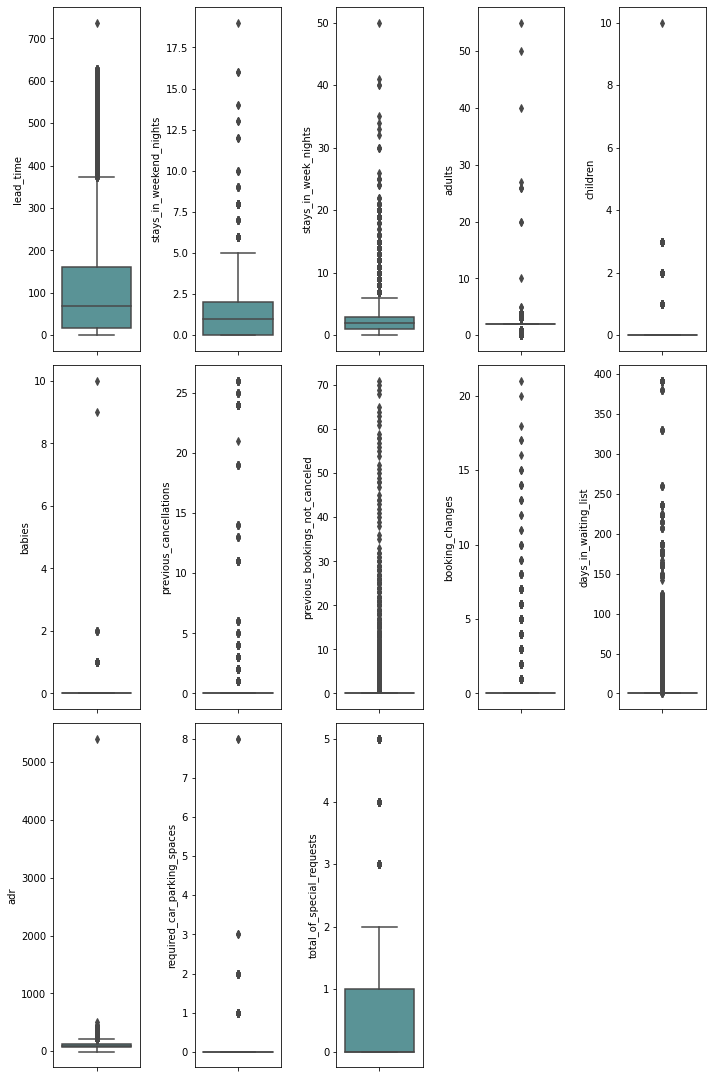

In [ ]:
# Boxplots (Numeric)

features = nums
plt.figure(figsize=(10, 20))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=X_train[features[i]], color='#509ca0', orient='v')
    plt.tight_layout();

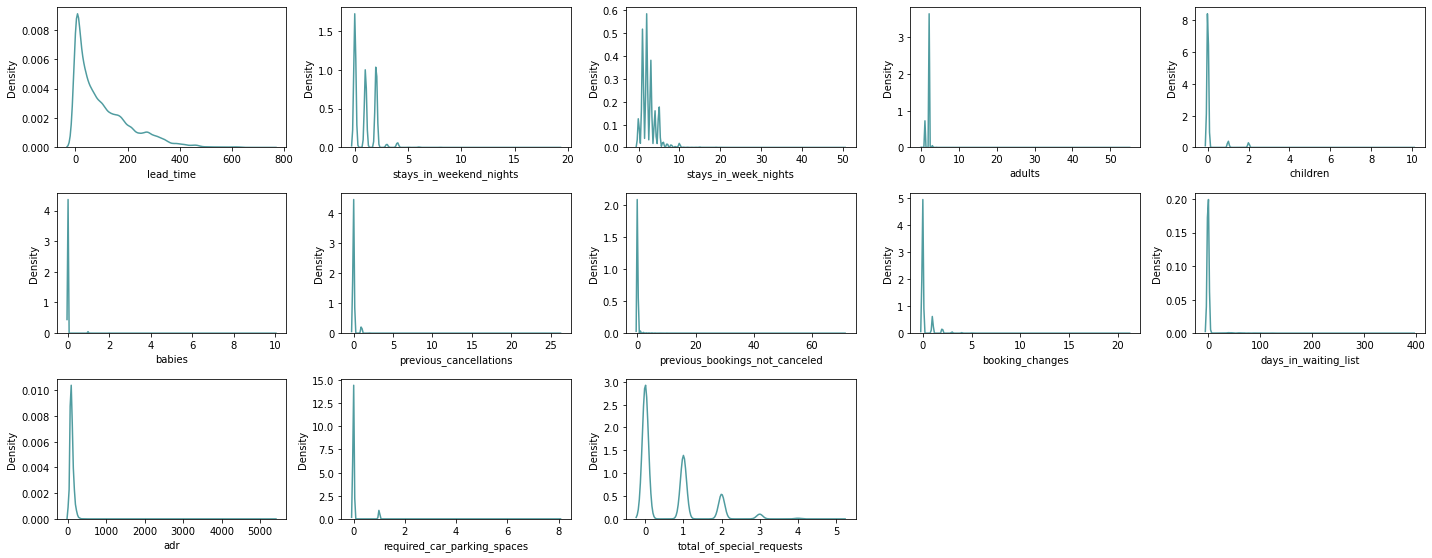

In [ ]:
# Distplots (Numeric)

features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.kdeplot(x=X_train[features[i]], color='#509ca0')
    plt.xlabel(features[i])
    plt.tight_layout();

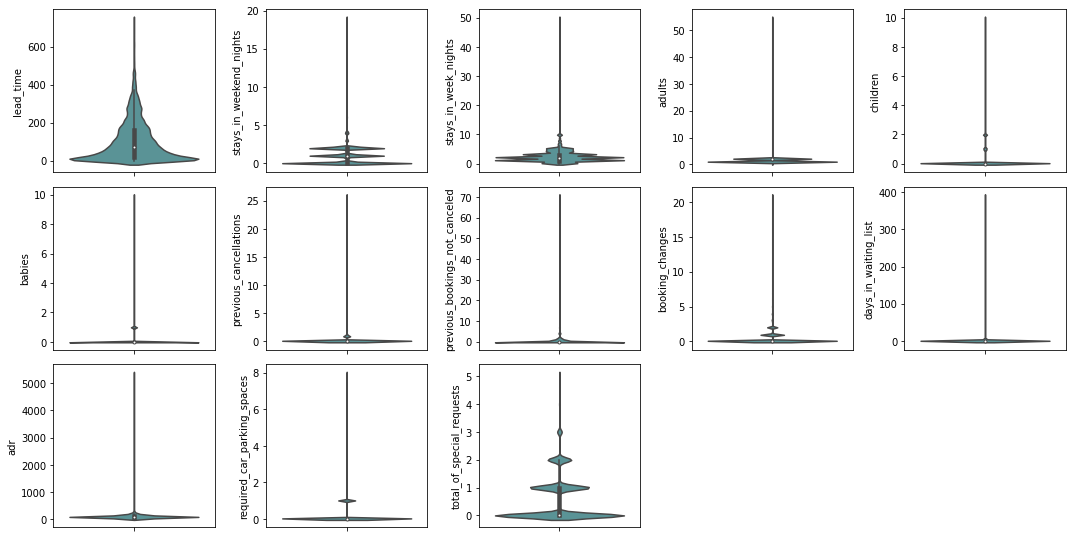

In [ ]:
# Violin Plots

features = nums
plt.figure(figsize=(15, 10))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.violinplot(y=X_train[features[i]], color='#509ca0')
    plt.tight_layout();

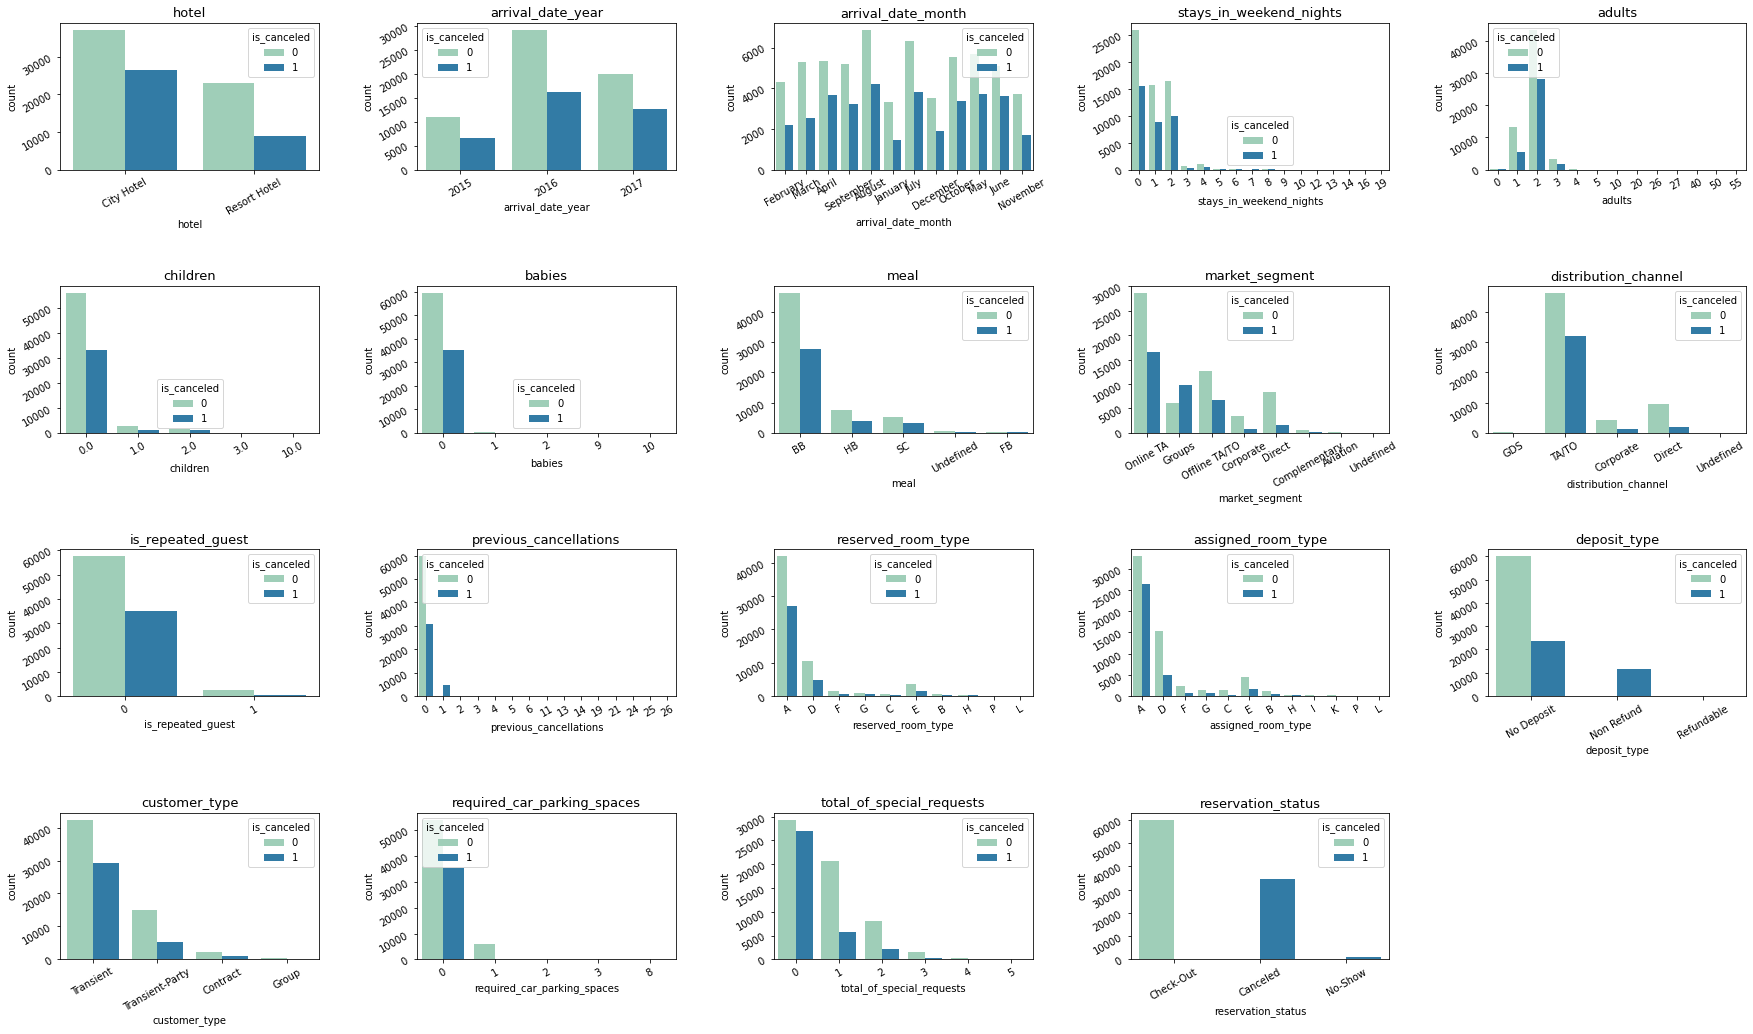

In [ ]:
# Countplot (Categorical)

d_visual = X_train.nunique()[X_train.nunique()<20].index
fig = plt.figure(figsize=(25,15))
for index, col in enumerate(d_visual):
    ax = fig.add_subplot(4, 5, index+1)
    ax.set_title(col,fontsize=13)
    ax.tick_params(labelrotation=30)
    sns.countplot(X_train[col], hue=y_train, ax=ax, palette="YlGnBu")
plt.tight_layout(pad=3);


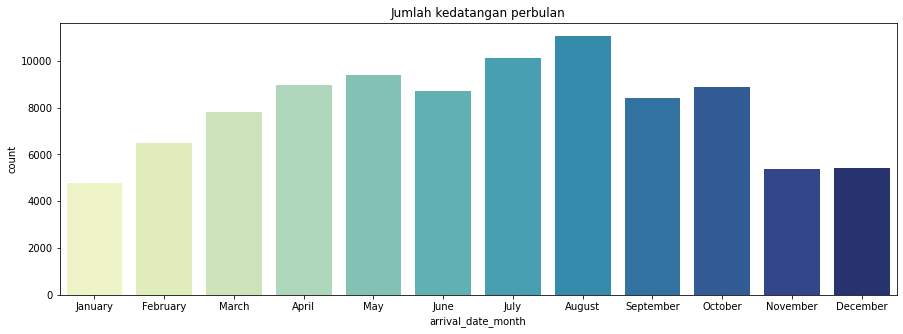

In [ ]:
plt.figure(figsize=(15, 5));
plt.title("Jumlah kedatangan perbulan");
sns.countplot(X_train.arrival_date_month, palette="YlGnBu", order=calendar.month_name[1:]);

Text(0.5, 1.0, 'Hotel Booking Berdasarkan Negara')

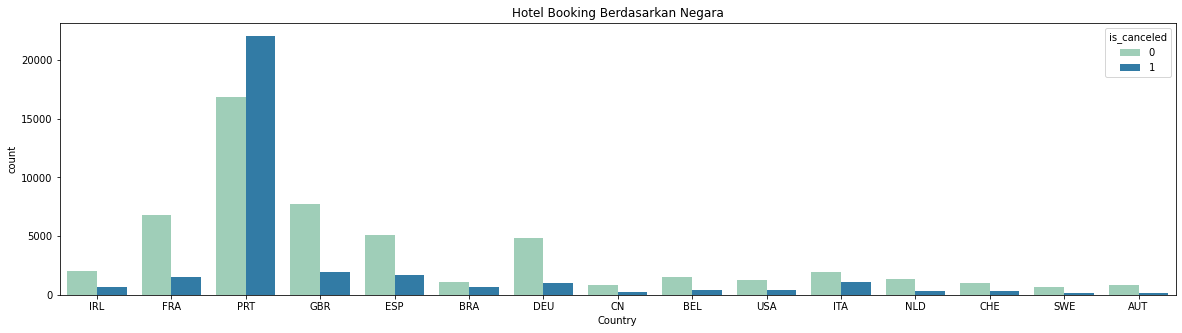

In [ ]:
X_train_country = X_train['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(20,5))
sns.countplot(x='country', hue=y_train, data=X_train[X_train['country'].isin(X_train_country.index)], palette="YlGnBu")
plt.xlabel("Country")
plt.title("Hotel Booking Berdasarkan Negara")

# Multivariate Analysis

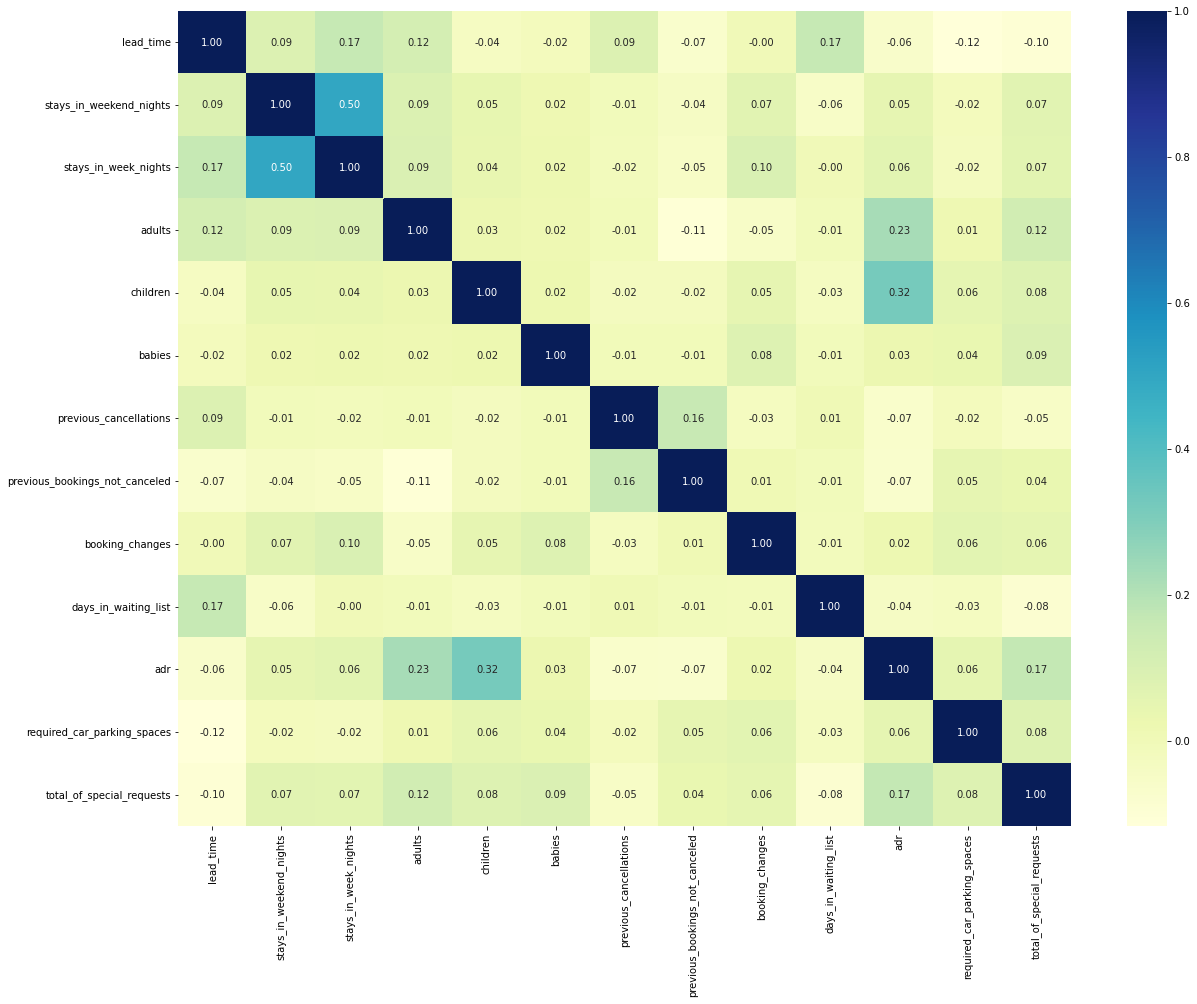

In [ ]:
# Heatmap Correlation 

df2 = X_train.drop(['arrival_date_year','arrival_date_day_of_month','arrival_date_week_number', 'agent','company', 'is_repeated_guest'], axis=1)
numericals2 = df2.loc[:, (df2.dtypes == int) | (df2.dtypes == float)].columns.tolist()
plt.figure(figsize=(20,15))
sns.heatmap(df2[numericals2].corr(), cmap='YlGnBu', annot=True, fmt='.2f');

# Handle missing values

In [ ]:
# Mengetahui jumlah baris yang kosong

X_train.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             391
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13034
company                           90111
days_in_waiting_list                  0


#### Dari hasil tersebut terdapat 4 kolom yang terdapat missing values, diantaranya :

1. children = 4
2. country  = 391
3. agent    = 13034
4. company  = 90111

### 1. Replace 4 baris yang kosong pada kolom Children dengan nilai median

In [ ]:
# Imputasi children dengan median

X_train['children'].fillna(X_train['children'].median(), inplace=True)

X_train.children.isna().sum()

0

### 2. Mengisi missing values pada kolom 'country' dengan nilai modus

In [ ]:
# Imputasi country dengan modus

X_train['country'].fillna(X_train['country'].mode()[0], inplace=True)

X_train.country.isna().sum()

0

### 3. Mengisi missing values pada kolom agent dengan nilai modus

In [ ]:
# Imputasi agent dengan modus

X_train['agent'].fillna(X_train['agent'].mode()[0], inplace=True)

X_train.agent.isna().sum()

0

### 4. Mengisi missing value pada kolom adults dengan nilai modus

Adults Abnormal Value

In [ ]:
X_train['adults'].describe()

count    95512.000000
mean         1.856008
std          0.584467
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

In [ ]:
X_train[X_train['adults']== 0].shape

(325, 35)

In [ ]:
# Missing value (di impute dengan modus)
# Karena tidak mungkin pada kolom adults bernilai 0, karena yang booking  kamar hotel pasti bukan children atau babies, harus adults.
# Sehingga dengan hal tersebut, nilai 'adults' = 0 perlu diimputasi dengan nilai modus

X_train['adults'].replace(0,X_train['adults'].mode()[0], inplace=True)

X_train['adults'].describe()

count    95512.000000
mean         1.862813
std          0.574373
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

### 5. Mengisi missing value pada kolom market_segment dengan nilai modus


In [ ]:
# market_segment Abnormal Value

X_train['market_segment'].value_counts()

Online TA        45214
Offline TA/TO    19370
Groups           15930
Direct            9977
Corporate         4224
Complementary      603
Aviation           192
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
# Terdapat 2 baris pada kolom market_segment dengan value Undefined

X_train[X_train['market_segment']== 'Undefined'].shape

(2, 35)

In [ ]:
# Missing value Undefined direplace dengan modus

X_train['market_segment'].replace('Undefined',X_train['market_segment'].mode()[0], inplace=True)

X_train['market_segment'].value_counts()

Online TA        45216
Offline TA/TO    19370
Groups           15930
Direct            9977
Corporate         4224
Complementary      603
Aviation           192
Name: market_segment, dtype: int64

### 6. Mengisi missing value pada kolom distribution_channel dengan nilai modus

In [ ]:
# distribution_channel Abnormal Value

X_train['distribution_channel'].value_counts()

TA/TO        78427
Direct       11610
Corporate     5315
GDS            156
Undefined        4
Name: distribution_channel, dtype: int64

In [ ]:
# Missing value Undefined direplace dengan modus

X_train['distribution_channel'].replace('Undefined',X_train['distribution_channel'].mode()[0], inplace=True)

X_train['distribution_channel'].value_counts()

TA/TO        78431
Direct       11610
Corporate     5315
GDS            156
Name: distribution_channel, dtype: int64

### 7. Mengisi missing value pada kolom meal dengan nilai modus

In [ ]:
# meal Abnormal Value

X_train['meal'].value_counts()

BB           73867
HB           11533
SC            8524
Undefined      954
FB             634
Name: meal, dtype: int64

In [ ]:
# Missing value Undefined direplace dengan nilai SC (no meal package)

X_train['meal'].replace('Undefined','SC',inplace=True)

X_train['meal'].value_counts()

BB    73867
HB    11533
SC     9478
FB      634
Name: meal, dtype: int64

### 8. Mengubah kode negara yang tidak diketahui pada kolom 'country' dengan nilai modus = 'PRT'

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pycountry
input_countries = X_train['country']

countries = {}
for country in pycountry.countries:
    countries[country.alpha_3] = country.alpha_3

X_train['country'] = [countries.get(country, 'PRT') for country in input_countries]

X_train.country.isna().sum()

0

In [ ]:
df2 = X_train.copy()

# Handle Outliers

### Data di normalisasi dahulu dengan yeo-Johnson sebelum dilakukan Z-score

In [ ]:
#define the numerical columns for normalization using yeo-johnson

 #normalization
data = df2[nums].values[:, :17]
power = PowerTransformer(method='yeo-johnson', standardize = False)
data = power.fit_transform(data)

#convert back arrays to dataframe
from pandas import DataFrame
dataset = DataFrame(data)

#name back the columns respectively
dataset.columns = [nums]


In [ ]:
df2.index = dataset.index
df3 = pd.concat([df2, dataset], axis=1)

In [ ]:
df4 = df3.drop(columns=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'])

In [ ]:
df4.head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card,"(lead_time,)","(stays_in_weekend_nights,)","(stays_in_week_nights,)","(adults,)","(children,)","(babies,)","(previous_cancellations,)","(previous_bookings_not_canceled,)","(booking_changes,)","(days_in_waiting_list,)","(adr,)","(required_car_parking_spaces,)","(total_of_special_requests,)"
0,City Hotel,2017,February,6,7,BB,IRL,Online TA,GDS,0,A,A,No Deposit,195.0,417.0,Transient,Check-Out,2017-02-09,Veronica Howard,Howard_Veronica@mail.com,715-252-1224,************6822,4.765678,-0.000000,1.138878,0.780213,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,24.659751,-0.0,-0.0
1,City Hotel,2016,March,11,9,BB,FRA,Groups,TA/TO,0,A,A,No Deposit,9.0,NaN,Transient-Party,Check-Out,2016-03-12,Emily French,French.Emily@aol.com,207-250-9007,************3435,3.018571,-0.000000,1.450816,1.327989,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,24.978022,-0.0,-0.0
2,City Hotel,2017,April,14,6,BB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,170.0,NaN,Transient,Canceled,2017-01-03,Angela Mcintyre,Angela_M@comcast.net,983-983-3158,************8351,9.054473,-0.000000,1.450816,1.327989,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,24.177490,-0.0,-0.0
3,Resort Hotel,2015,September,39,23,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,2.0,NaN,Contract,Check-Out,2015-10-07,Joseph Stewart,Joseph.S@verizon.com,570-058-9465,************7796,8.941705,1.291602,2.595316,1.327989,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,16.826885,-0.0,-0.0
4,City Hotel,2017,August,32,9,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,9.0,91.0,Transient,Check-Out,2017-08-10,Lindsay Smith,Lindsay_Smith@verizon.com,340-001-9700,************7645,3.018571,-0.000000,0.709034,0.780213,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,21.669526,-0.0,-0.0


In [ ]:
df4.columns

Index([                            'hotel',
                       'arrival_date_year',
                      'arrival_date_month',
                'arrival_date_week_number',
               'arrival_date_day_of_month',
                                    'meal',
                                 'country',
                          'market_segment',
                    'distribution_channel',
                       'is_repeated_guest',
                      'reserved_room_type',
                      'assigned_room_type',
                            'deposit_type',
                                   'agent',
                                 'company',
                           'customer_type',
                      'reservation_status',
                 'reservation_status_date',
                                    'name',
                                   'email',
                            'phone-number',
                             'credit_card',
                            ('le

In [ ]:
df4.columns=[                            'hotel',
                       'arrival_date_year',
                      'arrival_date_month',
                'arrival_date_week_number',
               'arrival_date_day_of_month',
                                    'meal',
                                 'country',
                          'market_segment',
                    'distribution_channel',
                       'is_repeated_guest',
                      'reserved_room_type',
                      'assigned_room_type',
                            'deposit_type',
                                   'agent',
                                 'company',
                           'customer_type',
                      'reservation_status',
                 'reservation_status_date',
                                    'name',
                                   'email',
                            'phone-number',
                             'credit_card',
                            'lead_time',
              'stays_in_weekend_nights',
                 'stays_in_week_nights',
                               'adults',
                             'children',
                               'babies',
               'previous_cancellations',
       'previous_bookings_not_canceled',
                      'booking_changes',
                 'days_in_waiting_list',
                                  'adr',
          'required_car_parking_spaces',
            'total_of_special_requests']

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95512 entries, 0 to 95511
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   arrival_date_year               95512 non-null  int64  
 2   arrival_date_month              95512 non-null  object 
 3   arrival_date_week_number        95512 non-null  int64  
 4   arrival_date_day_of_month       95512 non-null  int64  
 5   meal                            95512 non-null  object 
 6   country                         95512 non-null  object 
 7   market_segment                  95512 non-null  object 
 8   distribution_channel            95512 non-null  object 
 9   is_repeated_guest               95512 non-null  int64  
 10  reserved_room_type              95512 non-null  object 
 11  assigned_room_type              95512 non-null  object 
 12  deposit_type                    

### Z-score

In [ ]:
from scipy import stats

In [ ]:
data = df4[nums]

In [ ]:
data

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,4.765678,-0.000000,1.138878,0.780213,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,24.659751,-0.0,-0.000000
1,3.018571,-0.000000,1.450816,1.327989,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,24.978022,-0.0,-0.000000
2,9.054473,-0.000000,1.450816,1.327989,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,24.177490,-0.0,-0.000000
3,8.941705,1.291602,2.595316,1.327989,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,16.826885,-0.0,-0.000000
4,3.018571,-0.000000,0.709034,0.780213,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,21.669526,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95507,4.978638,0.943642,1.696832,0.780213,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,17.670715,-0.0,0.527371
95508,4.537467,0.629145,1.138878,0.780213,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,30.334087,-0.0,-0.000000
95509,10.412223,-0.000000,1.450816,1.327989,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,24.172637,-0.0,0.527371
95510,11.374020,0.943642,1.900513,1.327989,-0.0,-0.0,0.042207,0.040022,-0.000000,-0.0,27.048957,-0.0,0.424680


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))

for col in data:
    zscores = np.abs(stats.zscore(data[col])) # hitung absolute z-scorenya
    filtered_entries = (zscores < 3) # keep yang kurang dari 3 absolute z-scorenya
    
data = data[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 95512
Jumlah baris setelah memfilter outlier: 95512


In [ ]:
df5 = df4.copy()

# Feature Selection

1. Membuang feature-feature yang tidak relevan atau redundant<br>
   berdasarkan heatmap correlation, tidak ada feature yang redundant<br>
   kolom nama, phone-number, credit_card, dan email tidak relevant untuk model prediction

In [ ]:
df5.drop(['name', 'phone-number', 'credit_card'], axis = 1, inplace=True)

2. Membuang (Drop) kolom company, karena data non-null hanya berisi 5401 dari 95512 baris

In [ ]:
df5.drop(columns = 'company', inplace = True)

# Feature Extraction

## 1. Mengubah tipe data pada kolom: <br>
*   children  dari float64 ke int64, karena jumlah anak tidak mungkin berupa desimal
*   agent  dari float64 ke object, karena kolom agent menunjukkan ID agent yang seharunya berupa object
*   reservation_status_date dari object menjadi datetime, karena kolom tersebut lebih baik jika diubah ke bentuk datetime

In [ ]:
import datetime

df5['children'] = df5['children'].astype('int64')
df5['agent'] = df5['agent'].astype(str)
df5['reservation_status_date'] = pd.to_datetime(df5['reservation_status_date'])

## 2. Handle Incorrect Value

### ADR Abnormal Value

In [ ]:
df5['adr'].describe()

count    95512.000000
mean        24.501206
std          7.712571
min        -10.998024
25%         19.763467
50%         24.096532
75%         28.909471
max        289.397998
Name: adr, dtype: float64

In [ ]:
df5[df5['adr']<0].shape #terdapat 1 baris dengan nilai adr negatif (tidak masuk akal)

(1, 31)

In [ ]:
# ADR adalah Tarif Harian Rata-Rata. Dihitung dengan membagi jumlah semua transaksi penginapan dengan jumlah total malam menginap.
# Tidak mungkin nilai ADR minus, sehingga nilai 'adr' dibawah 0 perlu di drop

df5.drop(df5[df5['adr'] < 0].index, inplace = True)

df5['adr'].describe()

count    95511.000000
mean        24.501578
std          7.711756
min          0.000000
25%         19.763467
50%         24.096532
75%         28.909471
max        289.397998
Name: adr, dtype: float64

## 3. Membuat kolom baru, yakni visitor_origin untuk menandai asal pengunjung local (PRT) dan internasional (selain PRT)



In [ ]:
df5['visitor_origin'] = df5['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df5.head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status,reservation_status_date,email,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,visitor_origin
0,City Hotel,2017,February,6,7,BB,IRL,Online TA,GDS,0,A,A,No Deposit,195.0,Transient,Check-Out,2017-02-09,Howard_Veronica@mail.com,4.765678,-0.000000,1.138878,0.780213,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.659751,-0.0,-0.0,International
1,City Hotel,2016,March,11,9,BB,FRA,Groups,TA/TO,0,A,A,No Deposit,9.0,Transient-Party,Check-Out,2016-03-12,French.Emily@aol.com,3.018571,-0.000000,1.450816,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.978022,-0.0,-0.0,International
2,City Hotel,2017,April,14,6,BB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,170.0,Transient,Canceled,2017-01-03,Angela_M@comcast.net,9.054473,-0.000000,1.450816,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.177490,-0.0,-0.0,Local
3,Resort Hotel,2015,September,39,23,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,2.0,Contract,Check-Out,2015-10-07,Joseph.S@verizon.com,8.941705,1.291602,2.595316,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,16.826885,-0.0,-0.0,International
4,City Hotel,2017,August,32,9,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,9.0,Transient,Check-Out,2017-08-10,Lindsay_Smith@verizon.com,3.018571,-0.000000,0.709034,0.780213,0,-0.0,-0.0,-0.0,-0.0,-0.0,21.669526,-0.0,-0.0,International


## 4. Membuat kolom baru, yakni tahun, bulan, dan tanggal untuk memisahkan reservation_status_date yang awalnya berupa datetime

In [ ]:
import datetime as dt
df5['reservation_status_year'] = df5['reservation_status_date'].dt.year
df5['reservation_status_month'] = df5['reservation_status_date'].dt.month
df5['reservation_status_day'] = df5['reservation_status_date'].dt.day

In [ ]:
df5.drop(['reservation_status_date'],  axis = 1, inplace=True)
df5.head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status,email,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,visitor_origin,reservation_status_year,reservation_status_month,reservation_status_day
0,City Hotel,2017,February,6,7,BB,IRL,Online TA,GDS,0,A,A,No Deposit,195.0,Transient,Check-Out,Howard_Veronica@mail.com,4.765678,-0.000000,1.138878,0.780213,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.659751,-0.0,-0.0,International,2017,2,9
1,City Hotel,2016,March,11,9,BB,FRA,Groups,TA/TO,0,A,A,No Deposit,9.0,Transient-Party,Check-Out,French.Emily@aol.com,3.018571,-0.000000,1.450816,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.978022,-0.0,-0.0,International,2016,3,12
2,City Hotel,2017,April,14,6,BB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,170.0,Transient,Canceled,Angela_M@comcast.net,9.054473,-0.000000,1.450816,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.177490,-0.0,-0.0,Local,2017,1,3
3,Resort Hotel,2015,September,39,23,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,2.0,Contract,Check-Out,Joseph.S@verizon.com,8.941705,1.291602,2.595316,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,16.826885,-0.0,-0.0,International,2015,10,7
4,City Hotel,2017,August,32,9,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,9.0,Transient,Check-Out,Lindsay_Smith@verizon.com,3.018571,-0.000000,0.709034,0.780213,0,-0.0,-0.0,-0.0,-0.0,-0.0,21.669526,-0.0,-0.0,International,2017,8,10


## 5. Membuat kolom baru, domain_email untuk membedakan jenis doman email

In [ ]:
df5['domain'] = df5['email'].str.split('@').str[1]
df5.drop(['email'],  axis = 1, inplace=True)
df5.head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,visitor_origin,reservation_status_year,reservation_status_month,reservation_status_day,domain
0,City Hotel,2017,February,6,7,BB,IRL,Online TA,GDS,0,A,A,No Deposit,195.0,Transient,Check-Out,4.765678,-0.000000,1.138878,0.780213,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.659751,-0.0,-0.0,International,2017,2,9,mail.com
1,City Hotel,2016,March,11,9,BB,FRA,Groups,TA/TO,0,A,A,No Deposit,9.0,Transient-Party,Check-Out,3.018571,-0.000000,1.450816,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.978022,-0.0,-0.0,International,2016,3,12,aol.com
2,City Hotel,2017,April,14,6,BB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,170.0,Transient,Canceled,9.054473,-0.000000,1.450816,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,24.177490,-0.0,-0.0,Local,2017,1,3,comcast.net
3,Resort Hotel,2015,September,39,23,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,2.0,Contract,Check-Out,8.941705,1.291602,2.595316,1.327989,0,-0.0,-0.0,-0.0,-0.0,-0.0,16.826885,-0.0,-0.0,International,2015,10,7,verizon.com
4,City Hotel,2017,August,32,9,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,9.0,Transient,Check-Out,3.018571,-0.000000,0.709034,0.780213,0,-0.0,-0.0,-0.0,-0.0,-0.0,21.669526,-0.0,-0.0,International,2017,8,10,verizon.com


### 6.Outlier pada kolom ADR

In [ ]:
# Pada kolom 'adr', terdapat outlier dengan data paling besar yaitu 5400
# Hal tersebut sangat berbeda jauh dengan nilai mean & median sehingga perlu di drop

df5.drop(df5[df5['adr'] > 5000].index, inplace = True)

df5['adr'].describe()

count    95511.000000
mean        24.501578
std          7.711756
min          0.000000
25%         19.763467
50%         24.096532
75%         28.909471
max        289.397998
Name: adr, dtype: float64

In [ ]:
df5.shape

(95511, 34)

In [ ]:
df6 = df5.copy()

# Feature Transformation

### Normalization/Standardization

In [ ]:
#scaling using StandardScaler
for column in nums:
    df6[[column]] = StandardScaler().fit_transform(df6[[column]].values.reshape(len(df6), 1))

In [ ]:
df6.head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,visitor_origin,reservation_status_year,reservation_status_month,reservation_status_day,domain
0,City Hotel,2017,February,6,7,BB,IRL,Online TA,GDS,0,A,A,No Deposit,195.0,Transient,Check-Out,-0.708109,-1.076772,-0.075222,-1.835492,0.0,-0.086541,-0.239247,-0.176516,-0.421726,-0.179023,0.020511,-0.256732,-0.826108,International,2017,2,9,mail.com
1,City Hotel,2016,March,11,9,BB,FRA,Groups,TA/TO,0,A,A,No Deposit,9.0,Transient-Party,Check-Out,-1.122269,-1.076772,0.504178,0.324179,0.0,-0.086541,-0.239247,-0.176516,-0.421726,-0.179023,0.061782,-0.256732,-0.826108,International,2016,3,12,aol.com
2,City Hotel,2017,April,14,6,BB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,170.0,Transient,Canceled,0.308569,-1.076772,0.504178,0.324179,0.0,-0.086541,-0.239247,-0.176516,-0.421726,-0.179023,-0.042025,-0.256732,-0.826108,Local,2017,1,3,comcast.net
3,Resort Hotel,2015,September,39,23,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,2.0,Contract,Check-Out,0.281837,1.938039,2.629996,0.324179,0.0,-0.086541,-0.239247,-0.176516,-0.421726,-0.179023,-0.995199,-0.256732,-0.826108,International,2015,10,7,verizon.com
4,City Hotel,2017,August,32,9,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,9.0,Transient,Check-Out,-1.122269,-1.076772,-0.873624,-1.835492,0.0,-0.086541,-0.239247,-0.176516,-0.421726,-0.179023,-0.367240,-0.256732,-0.826108,International,2017,8,10,verizon.com


# Feature Encoding


In [ ]:
#cats = ['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number', 'meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status',
# 'reservation_status_date','agent']

In [ ]:
#Feature terbaru untuk Encoding 
cats_update = ['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number','meal','country','market_segment','agent','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status', 'visitor_origin', 'domain','reservation_status_year' ]
for col in cats_update:
  print(f'value counts of column {col}')
  print(df6[col].value_counts())
  print('---'*10, '\n')

#Jenis Feature Encoding
label = ['hotel','visitor_origin']
one_hot_encoding = ['arrival_date_year','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status', 'domain','reservation_status_year', 'reservation_status_month']
binary_encoding = ['lead_time','arrival_date_day_of_month','arrival_date_week_number','agent', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'reservation_status_day']

value counts of column hotel
City Hotel      63585
Resort Hotel    31926
Name: hotel, dtype: int64
------------------------------ 

value counts of column arrival_date_year
2016    45448
2017    32504
2015    17559
Name: arrival_date_year, dtype: int64
------------------------------ 

value counts of column arrival_date_month
August       11060
July         10111
May           9407
April         8976
October       8893
June          8732
September     8424
March         7822
February      6476
December      5424
November      5398
January       4788
Name: arrival_date_month, dtype: int64
------------------------------ 

value counts of column arrival_date_day_of_month
17    3532
5     3485
15    3348
25    3318
9     3313
26    3311
12    3291
19    3236
2     3235
16    3234
20    3215
18    3196
24    3176
28    3147
30    3140
8     3104
3     3089
27    3068
6     3067
14    3022
21    2999
4     2996
13    2973
7     2957
1     2917
23    2882
10    2876
22    2871
11    2866
29  

In [ ]:
# Label Encoding 
mapping_hotel = {
    'City Hotel' : 0,
    'Resort Hotel' : 1
}

mapping_visitor_origin = {
    'Local' : 0,
    'Internasional' : 1
}

df6['hotel'] = df6['hotel'].map(mapping_hotel)
df6['visitor_origin'] = df6['visitor_origin'].map(mapping_visitor_origin)

In [ ]:
# One hot encoder pada feature yang terdapat di one_hot_encoding 
# WARNING: run code ini sekali saja
for cat in one_hot_encoding:
    onehots = pd.get_dummies(df6[cat], prefix=cat)
    df6 = df6.join(onehots)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.6 MB/s 


In [ ]:
import category_encoders as ce

data = df6[binary_encoding].values[:, :-1]
encoder = ce.BinaryEncoder()
binary = encoder.fit_transform(data)
    
from pandas import DataFrame
dataset = DataFrame(binary)

In [ ]:
dataset.head()

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,1_0,1_1,1_2,1_3,1_4,2_0,2_1,2_2,2_3,2_4,2_5,3_0,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_8,4_0,4_1,4_2,4_3,4_4,5_0,5_1,5_2,5_3,5_4,5_5,6_0,6_1,6_2,6_3,7_0,7_1,7_2,7_3,7_4,7_5,7_6,7_7,8_0,8_1,8_2,9_0,9_1,9_2,10_0,10_1,10_2,10_3,10_4,11_0,11_1,11_2,11_3,11_4,11_5,11_6,12_0,12_1,12_2,12_3,12_4,12_5,12_6,12_7,12_8,12_9,12_10,12_11,12_12
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


## Drop kolom-kolom yang outdated

In [ ]:
# drop kolom  yang sudah di encoding
df6 = df6.drop(columns=['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number','meal','country','market_segment','agent','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status', 'visitor_origin', 'domain','reservation_status_year'])

In [ ]:
df6.head()

,is_repeated_guest,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,reservation_status_day,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,domain_aol.com,domain_att.com,domain_comcast.net,domain_gmail.com,domain_hotmail.com,domain_mail.com,domain_outlook.com,domain_protonmail.com,domain_verizon.com,domain_xfinity.com,domain_yahoo.com,domain_yandex.com,domain_zoho.com,reservation_status

# Handle class imbalance

In [ ]:
y_train.value_counts()

0    60133
1    35379
Name: is_canceled, dtype: int64

In [ ]:
# Oversampling SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1,random_state = 42)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(df6,  y_train)
print(pd.Series(y_over_SMOTE).value_counts())

ValueError: ignored

In [ ]:
X_df = pd.DataFrame(X_over_SMOTE)
y_df = pd.DataFrame(y_over_SMOTE, columns=['is_canceled'])

NameError: ignored